**RANDOM FOREST MODEL**

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df1 = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [ ]:
df1

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


In [ ]:
X= df1.drop(columns=['Purchased','User ID'])
y = df1['Purchased']


In [ ]:
X

,Age,EstimatedSalary,Gender_Male
0,19,19000,True
1,35,20000,True
2,26,43000,False
3,27,57000,False
4,19,76000,True
...,...,...,...
395,46,41000,False
396,51,23000,True
397,50,20000,False
398,36,33000,True


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train

,Age,EstimatedSalary,Gender_Male
250,44,39000,False
63,32,120000,True
312,38,50000,False
159,32,135000,False
283,52,21000,False
...,...,...,...
323,48,30000,False
192,29,43000,True
117,36,52000,True
47,27,54000,False


In [ ]:
X_test

,Age,EstimatedSalary,Gender_Male
132,30,87000,True
309,38,50000,False
341,35,75000,True
196,30,79000,False
246,35,50000,False
...,...,...,...
146,27,96000,False
135,23,63000,True
390,48,33000,True
264,48,90000,True


In [ ]:
y_train

250    0
63     1
312    0
159    1
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 300, dtype: int64

In [ ]:
import sklearn.ensemble

RFmodel =  sklearn.ensemble.RandomForestClassifier(n_estimators= 100, max_features= 3, random_state=42, oob_score=True, )

RFmodel.fit(X_train, y_train)

RandomForestClassifier(max_features=3, oob_score=True, random_state=42)

array([0.51059476, 0.46450151, 0.02490373])

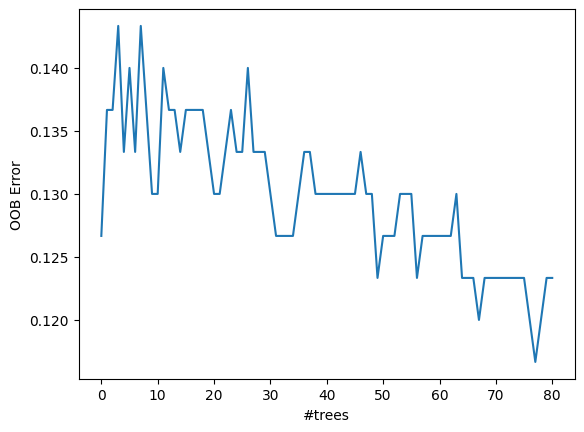

In [ ]:
error_rate = []
n_estimators = 100
for i in range(20, n_estimators + 1):
    RFmodel.set_params(n_estimators=i)
    RFmodel.fit(X_train, y_train)
    oob_error = 1 - RFmodel.oob_score_
    #print (i, oob_error)
    error_rate.append(oob_error)

import matplotlib.pyplot as plt

x_values = range(len(error_rate))

# Plotting the data
plt.plot(x_values, error_rate)

# Adding labels and title
plt.xlabel("#trees")
plt.ylabel("OOB Error")


#y_pred = RFmodel.predict( X_test )

#ape = abs(y_pred - y_test)/y_test *100

#ape.mean()


RFmodel.feature_importances_


In [ ]:
# increasing the n estimators to 200

In [ ]:
RFmodel =  sklearn.ensemble.RandomForestClassifier(n_estimators= 200, max_features= 3, random_state=42, oob_score=True, )

RFmodel.fit(X_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=200, oob_score=True,
                       random_state=42)

array([0.50737836, 0.46878357, 0.02383807])

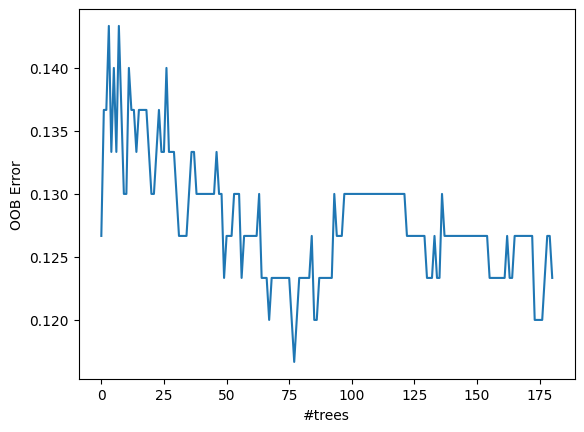

In [ ]:
error_rate = []
n_estimators = 200
for i in range(20, n_estimators + 1):
    RFmodel.set_params(n_estimators=i)
    RFmodel.fit(X_train, y_train)
    oob_error = 1 - RFmodel.oob_score_
    #print (i, oob_error)
    error_rate.append(oob_error)

import matplotlib.pyplot as plt

x_values = range(len(error_rate))

# Plotting the data
plt.plot(x_values, error_rate)

# Adding labels and title
plt.xlabel("#trees")
plt.ylabel("OOB Error")


#y_pred = RFmodel.predict( X_test )

#ape = abs(y_pred - y_test)/y_test *100

#ape.mean()


RFmodel.feature_importances_

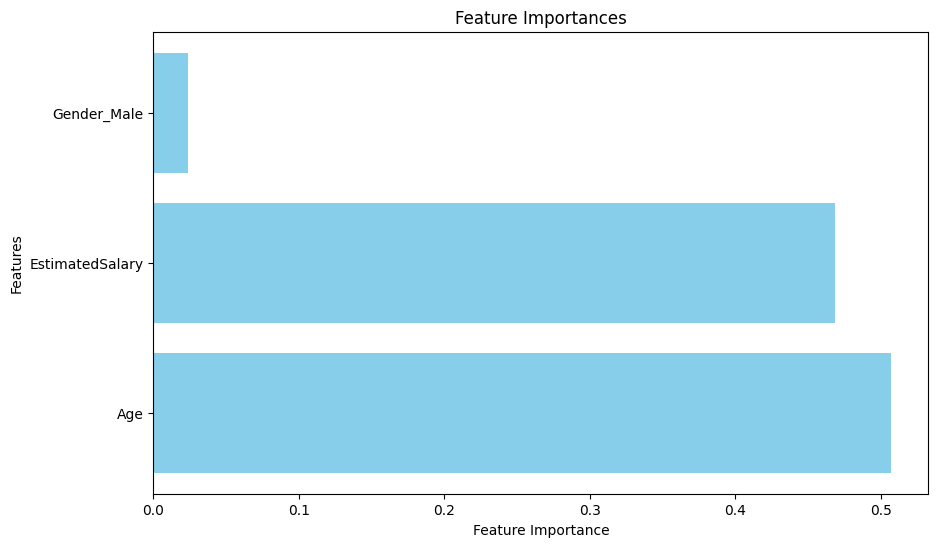

In [ ]:
# Example feature importances (replace with your actual feature importances)
feature_importances = np.array([0.50737836, 0.46878357, 0.02383807])

# Define the names of the features (replace with your actual feature names if available)
feature_names = ['Age',	'EstimatedSalary',	'Gender_Male'
                 ]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

Surprsingly, it seems like 'Age' holds the most influence out of all features in influencing an individual's decision to purchase, inching ahead of 'Estimated Salary'.  

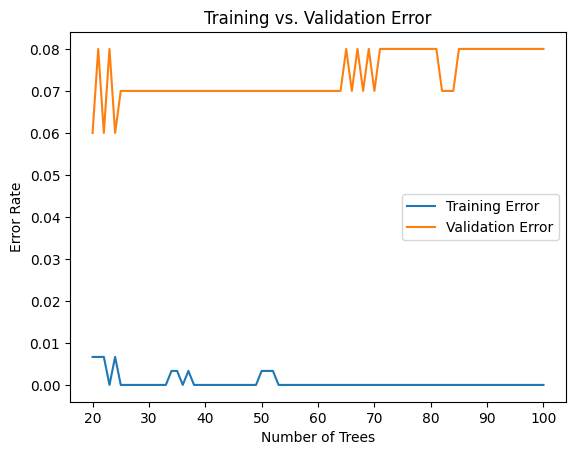

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Initialize lists to store errors
training_errors = []
validation_errors = []

# Number of estimators to test
n_estimators = 100

# Loop over different numbers of trees
for i in range(20, n_estimators + 1):
    RFmodel = RandomForestClassifier(n_estimators=i, max_features=3, random_state=42, oob_score=True)
    RFmodel.fit(X_train, y_train)

    # Predict on training data
    y_train_pred = RFmodel.predict(X_train)
    train_error = 1 - accuracy_score(y_train, y_train_pred)

    # Predict on validation data
    y_test_pred = RFmodel.predict(X_test)
    val_error = 1 - accuracy_score(y_test, y_test_pred)

    # Store the errors
    training_errors.append(train_error)
    validation_errors.append(val_error)

# Plotting the training and validation errors
plt.plot(range(20, n_estimators + 1), training_errors, label='Training Error')
plt.plot(range(20, n_estimators + 1), validation_errors, label='Validation Error')
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.title('Training vs. Validation Error')
plt.legend()
plt.show()

In [ ]:
#seems the model with 100 tress is suitable,
# as per the above plot there is no overfitting issue as well.

In [ ]:
import numpy as np

In [ ]:
mean_age = df1["Age"].mean()
mean_estimated_salary = df1["EstimatedSalary"].mean()
mode_Gender_Male = df1["Gender_Male"].mode()[0]

In [ ]:
#simulation by Age

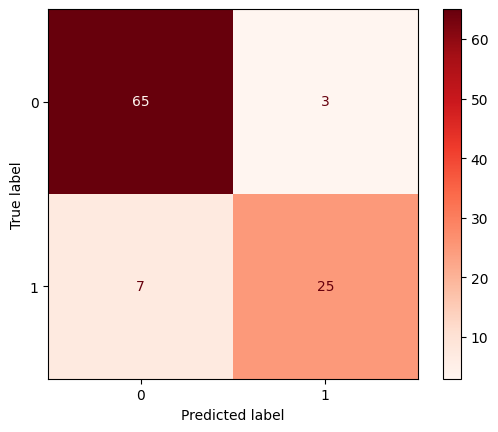

In [ ]:
# Assessingg the accuracy of the RF model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm_rf = confusion_matrix(y_test, y_pred)
conf_matrix_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
conf_matrix_rf.plot(cmap=plt.cm.Reds)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test,y_pred)
print(f'The accuracy score for the RF model is {accuracy}')

The accuracy score for the RF model is 0.9


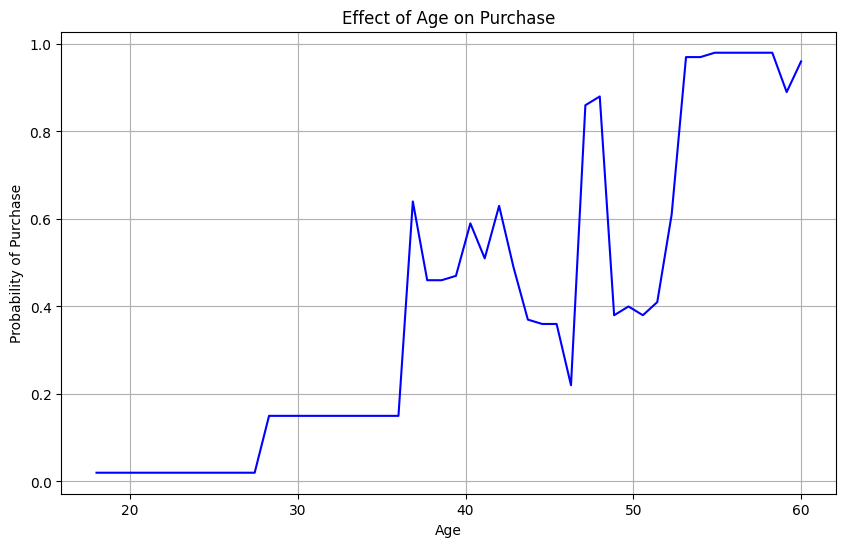

In [ ]:
min_age = df1["Age"].min()
max_age = df1["Age"].max()
age_range = np.linspace(min_age, max_age, num=50)

predicted_Purchased_Age = []

for age in age_range:
    prediction_data_rf = pd.DataFrame({
    'Age': [age],
    'EstimatedSalary':[mean_estimated_salary],
    'Gender_Male': [mode_Gender_Male]

    })

    predicted_Pur= RFmodel.predict_proba(prediction_data_rf)[0][1]
    predicted_Purchased_Age.append(predicted_Pur)


    # Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(age_range, predicted_Purchased_Age, label='Age', color='blue')
plt.xlabel('Age')
plt.ylabel('Probability of Purchase')
plt.title('Effect of Age on Purchase')
plt.grid(True)
plt.show()



The slope of the graph where the age is between 35 and 55 is: 0.02186231884057971


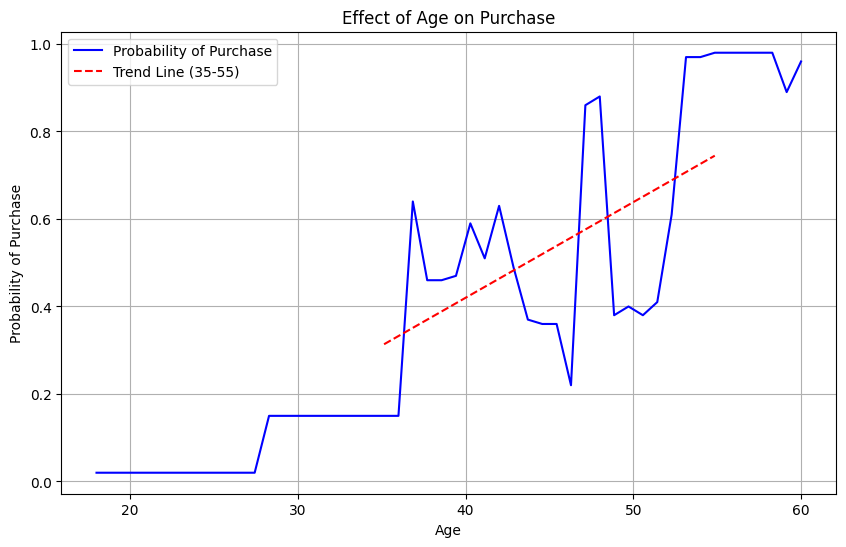

In [ ]:
from sklearn.linear_model import LinearRegression


# For the range 35 to 55
indices = np.where((age_range >= 35) & (age_range <= 55))


selected_ages = age_range[indices]
selected_probabilities = np.array(predicted_Purchased_Age)[indices]

# Reshape the age data for linear regression
X = selected_ages.reshape(-1, 1)
y = selected_probabilities

# Perform linear regression
reg = LinearRegression().fit(X, y)

slope = reg.coef_[0]

# Generate points for the trend line
trendline_y = reg.predict(X)

print(f"The slope of the graph where the age is between 35 and 55 is: {slope}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(age_range, predicted_Purchased_Age, label='Probability of Purchase', color='blue')
plt.plot(selected_ages, trendline_y, label='Trend Line (35-55)', color='red', linestyle='--')
plt.xlabel('Age')
plt.ylabel('Probability of Purchase')
plt.title('Effect of Age on Purchase')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Simulation by Estimated Salary

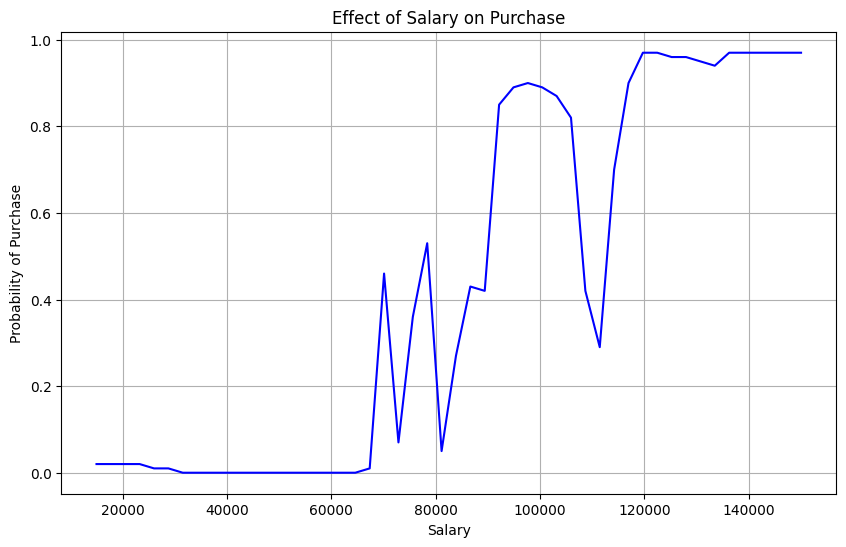

In [ ]:
min_estimated_salary = df1["EstimatedSalary"].min()
max_estimated_salary = df1["EstimatedSalary"].max()
estimated_salary_range = np.linspace(min_estimated_salary, max_estimated_salary, num=50)

predicted_Purchased_Salary = []

for salary in estimated_salary_range:
    prediction_data_rf = pd.DataFrame({
    'Age': [mean_age],
    'EstimatedSalary':[salary],
    'Gender_Male': [mode_Gender_Male]

    })

    predicted_Pur= RFmodel.predict_proba(prediction_data_rf)[0][1]
    predicted_Purchased_Salary.append(predicted_Pur)


    # Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(estimated_salary_range, predicted_Purchased_Salary, label='Salary', color='blue')
plt.xlabel('Salary')
plt.ylabel('Probability of Purchase')
plt.title('Effect of Salary on Purchase')
plt.grid(True)
plt.show()

The slope of the graph where the salary is between 60,000 and 100,000 is: 2.378803418803419e-05


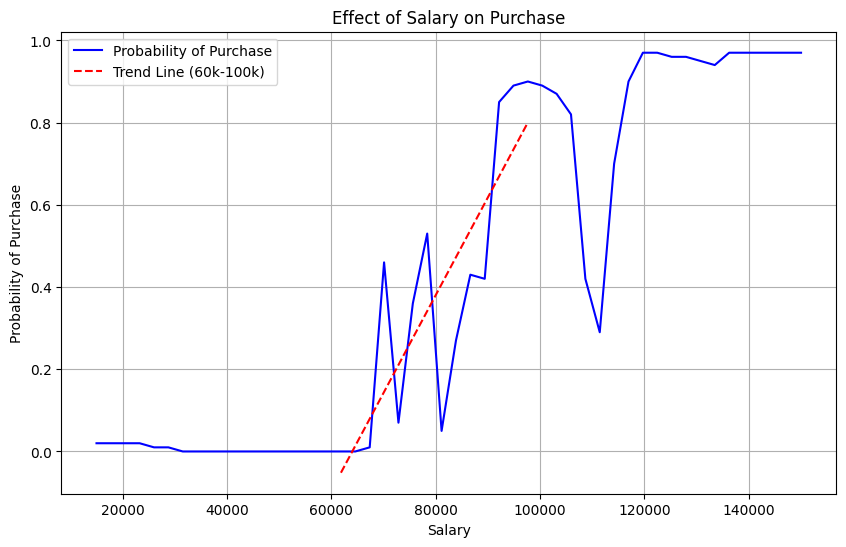

In [ ]:
# Slope

from sklearn.linear_model import LinearRegression

# FFor the range 60000 to 100000
indices = np.where((estimated_salary_range >= 60000) & (estimated_salary_range <= 100000))

# Extract the corresponding salary and predicted purchase probabilities
selected_salaries = estimated_salary_range[indices]
selected_probabilities = np.array(predicted_Purchased_Salary)[indices]

# Reshape the salary data for linear regression
X = selected_salaries.reshape(-1, 1)
y = selected_probabilities

# Perform linear regression
reg = LinearRegression().fit(X, y)

# Get the slope (coefficient) of the regression line
slope = reg.coef_[0]

# Generate points for the trend line
trendline_y = reg.predict(X)

print(f"The slope of the graph where the salary is between 60,000 and 100,000 is: {slope}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(estimated_salary_range, predicted_Purchased_Salary, label='Probability of Purchase', color='blue')
plt.plot(selected_salaries, trendline_y, label='Trend Line (60k-100k)', color='red', linestyle='--')
plt.xlabel('Salary')
plt.ylabel('Probability of Purchase')
plt.title('Effect of Salary on Purchase')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Simulation by Gender male

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


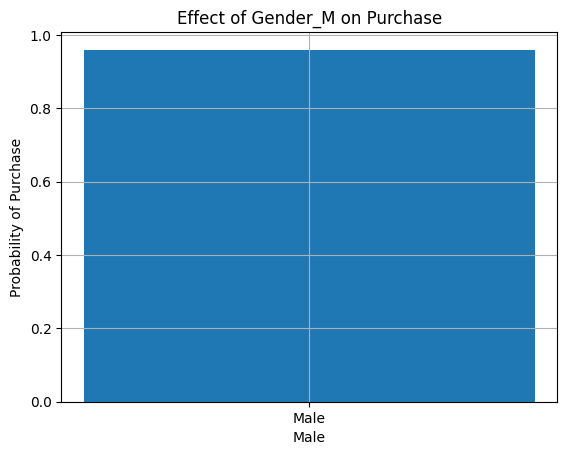

In [ ]:

predicted_Purchased_Male = pd.DataFrame({

'Age': [mean_age],
'EstimatedSalary':[mean_estimated_salary],
'Gender_Male': [True]

})
predicted_Pur = RFmodel.predict_proba(predicted_Purchased_Male)


plt.bar([ 'Male'], predicted_Pur[0])
plt.xlabel('Male')
plt.ylabel('Probability of Purchase')
plt.title('Effect of Gender_M on Purchase')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


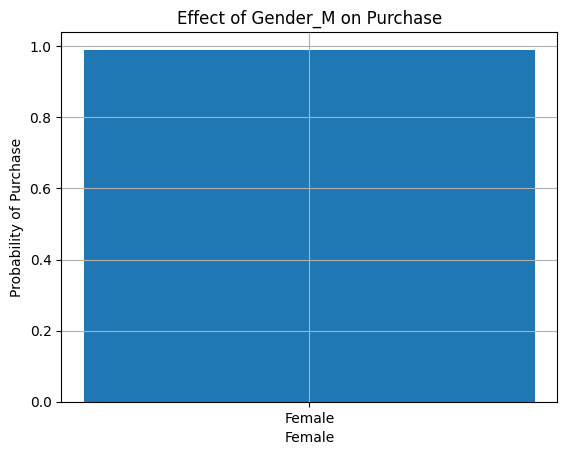

In [ ]:
predicted_Purchased_Female = pd.DataFrame({
 'Age': [mean_age],
'EstimatedSalary':[mean_estimated_salary],
'Gender_Male': [False]

})
predicted_Pur = RFmodel.predict_proba(predicted_Purchased_Female)


plt.bar([ 'Female'], predicted_Pur[0])
plt.xlabel('Female')
plt.ylabel('Probability of Purchase')
plt.title('Effect of Gender_M on Purchase')
plt.grid(True)
plt.show()

**`EXPLORATORY DATA ANALYSIS`**

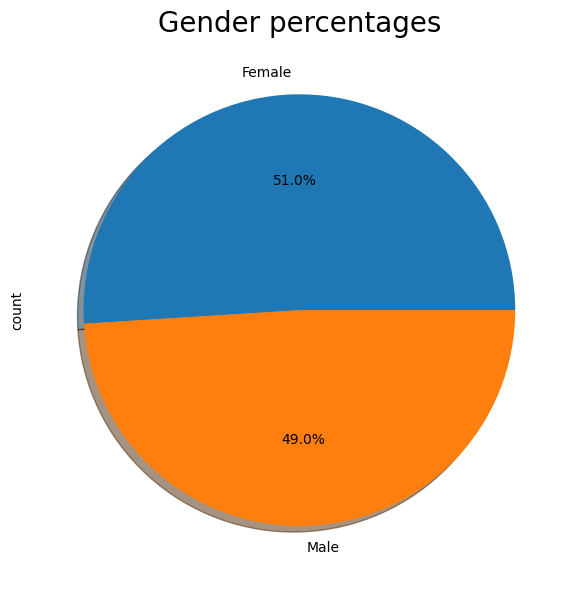

In [ ]:
# Evaluate gender, salary and age are distributed
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,6))
plt.title('Gender percentages', fontsize = 20)
plt.tight_layout()
plt.show()

<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

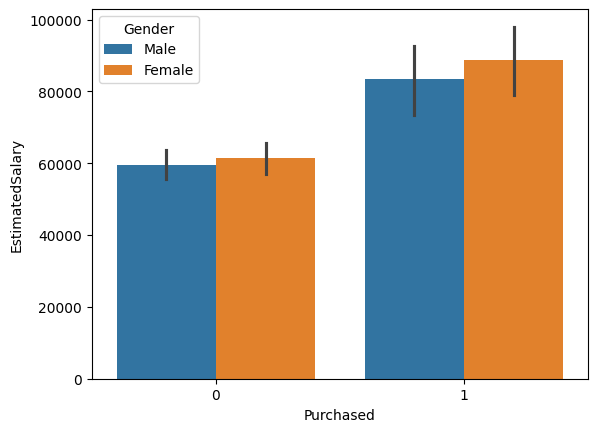

In [ ]:
sns.barplot(x="Purchased", y="EstimatedSalary",hue='Gender', data=df)

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

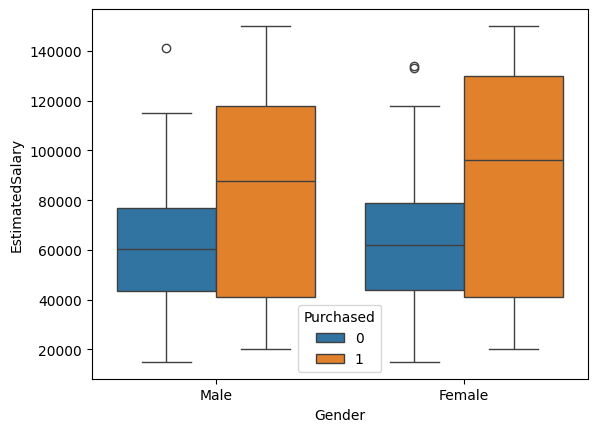

In [ ]:
sns.boxplot(y='EstimatedSalary', x='Gender',data=df,hue='Purchased')

The number of female purchasers is bigger than their male counterpart.

Based on the above figure, female has a higher estimated salary, which sees them purchase more than their male counterpart. Moreover, the mean and median values of the female group are bigger than those of the male group, with indication that those with high salaries are more likely to purchase.  

<Axes: xlabel='Gender', ylabel='Age'>

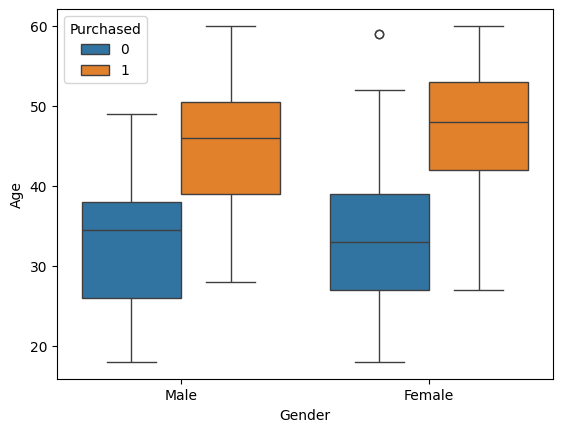

In [ ]:
sns.boxplot(y='Age', x='Gender',data=df,hue='Purchased')

There is not big of an age gap between the two gender groups. However, older people (both genders included) are more likely to make a purchase than younger people.

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

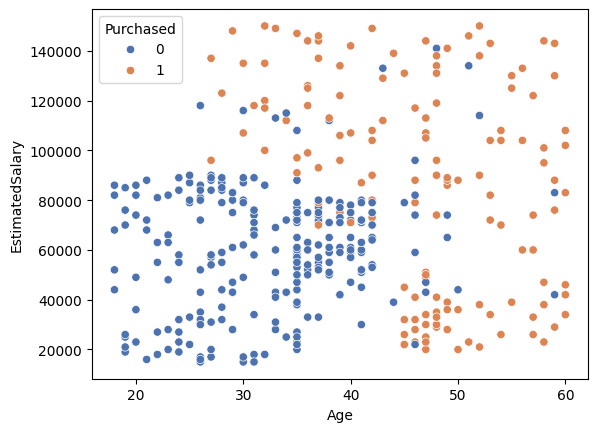

In [ ]:
# Scatterplot: Age vs Salary

sns.scatterplot(x = 'Age',y = 'EstimatedSalary', data = df, hue = 'Purchased', palette ='deep')

It is evident that those younger than 30 years old with a lower salary range below $60,000 are less likely to buy the product. As age increases, particularly those above the 35 age mark, the more likely it is that people will make the purchase (irrespective of their salary).   

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

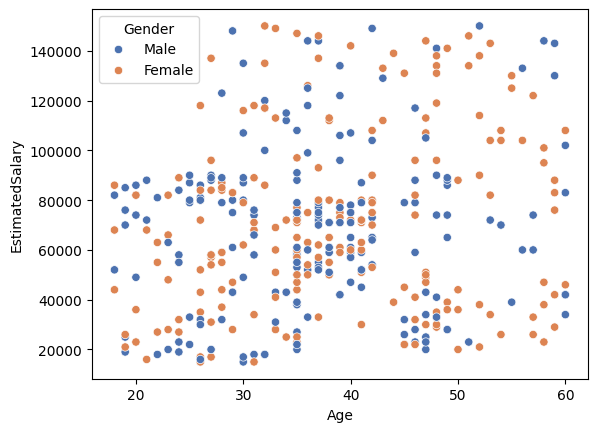

In [ ]:
# Scatterplot: Age vs Gender
sns.scatterplot(x = 'Age',y = 'EstimatedSalary', data = df, hue = 'Gender', palette ='deep')

The scatterplot above shows that expected income range varies substantially across different ages for both males and females, with no clear gender pattern.

<ipython-input-96-6c7e3a6602be>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Age'],kde=True, palette = 'deep',bins=25)


<Axes: xlabel='Age', ylabel='Count'>

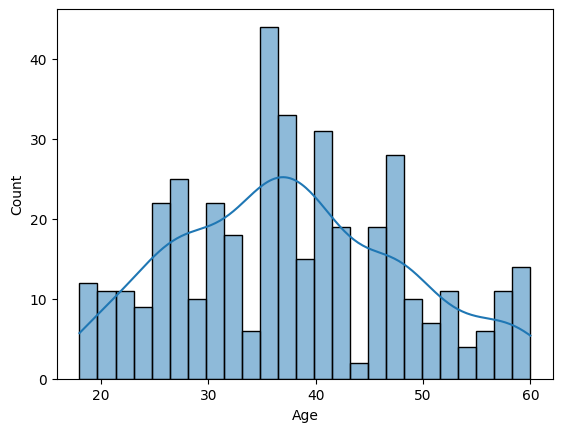

In [ ]:
sns.histplot(df['Age'],kde=True, palette = 'deep',bins=25)

It seems like the distribution is skewed towards age group of 35 to 38, indicating that the product is primarily targeting customers who are in their mid 30s.

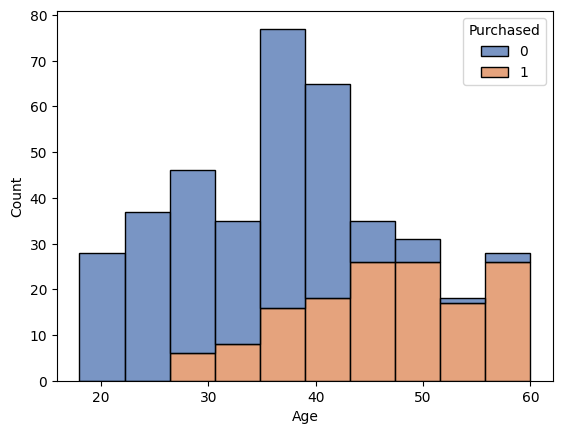

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="Age", hue="Purchased", multiple="stack", palette="deep")
plt.show()

<ipython-input-71-fc0aa06c8692>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Gender", col = 'Purchased', data=df, kind = 'count', palette='deep')


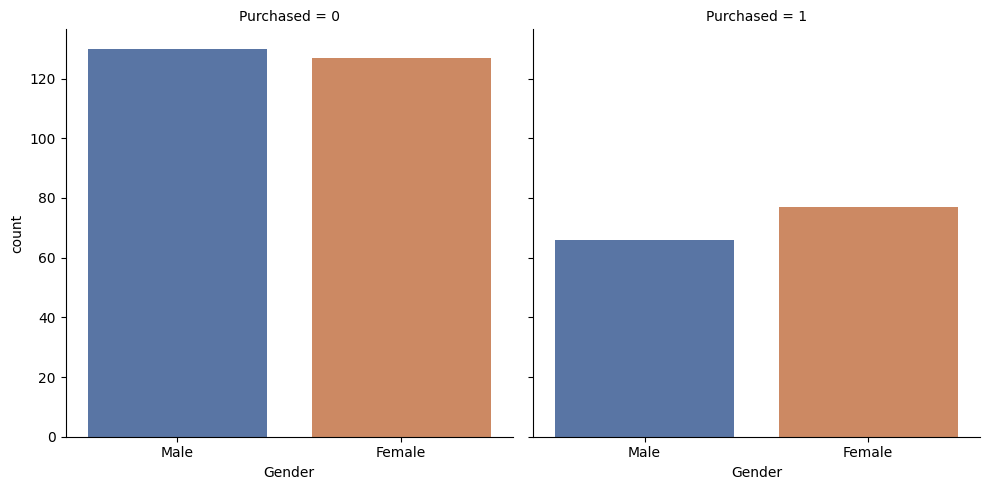

In [ ]:
# Purchased column statistics
sns.catplot(x="Gender", col = 'Purchased', data=df, kind = 'count', palette='deep')
plt.show()

Most of the people in the dataset (male and female combined) did not make a purchase after being exposed to the ads. From all of the data gathered, we can infer that the product is targeted towards people that are in their mid-30s with high estimated salaries.

In [ ]:
avg_salary = df.EstimatedSalary.mean()
print(f"The Mean Estimated Salary: ${avg_salary}")

The Mean Estimated Salary: $69742.5


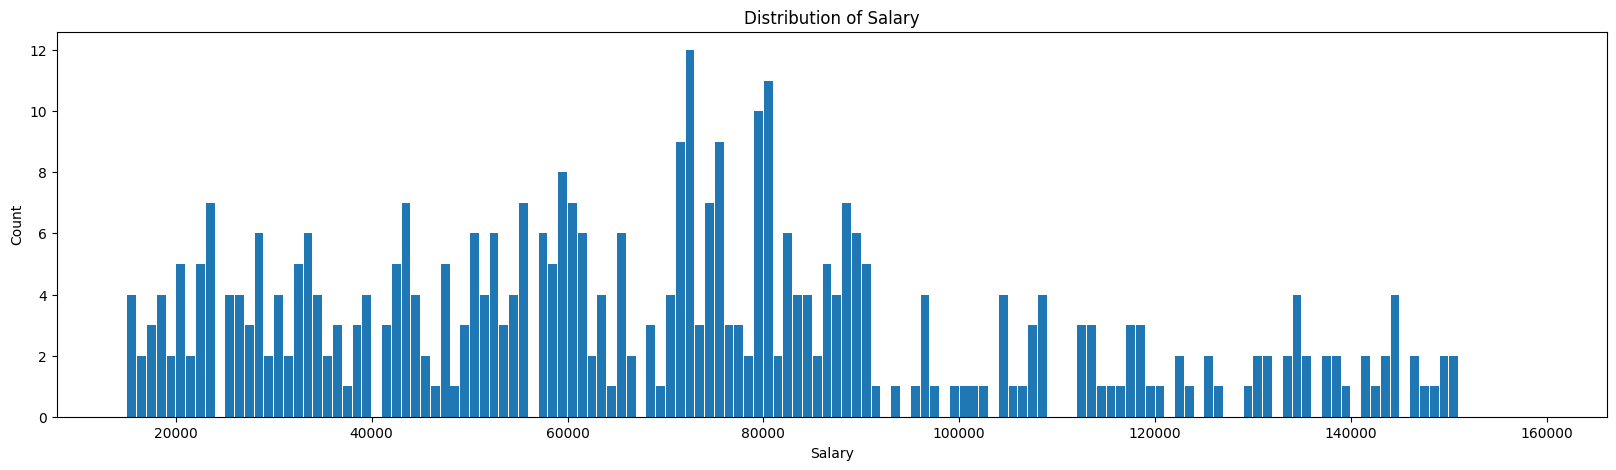

In [ ]:
plt.figure(figsize=(20,5))
bins_size = np.arange(15000,150000+10000,1000)
plt.hist(x="EstimatedSalary", data=df, bins= bins_size,rwidth=0.9);
plt.title('Distribution of Salary');
plt.ylabel('Count');
plt.xlabel('Salary');

The most common salary range is between $60000 - $80000, with the average estimated salary being $69742.5

**SUPPORT VECTOR MACHINE**

In [ ]:
import numpy as np
df.describe(np.arange(.1,1,.1))

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
10%,1.559187e+07,24.000000,26000.000000,0.000000
20%,1.561290e+07,28.000000,37800.000000,0.000000
30%,1.564387e+07,31.000000,50000.000000,0.000000
40%,1.567133e+07,35.000000,59000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
60%,1.571709e+07,40.000000,75000.000000,0.000000


In [ ]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

lda = LDA()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("LDA Accuracy:", accuracy)

LDA Accuracy: 0.9


High LDA (linear discriminant accuracy) score of 90% suggests that the data is linearly separable. Therefore,  linear kernel is the most optimal choice to train the SVM.  

*Linear* *Kernel*

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',probability=True )
classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
y_pred_linear = classifier.predict(X_test)
y_pred_linear

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test,y_pred_linear)
print(f'The linear accuracy score for the SVM model is {accuracy}')

The linear accuracy score for the SVM model is 0.89


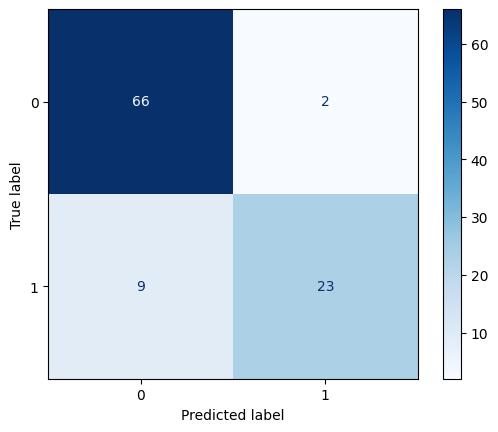

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm_linear = confusion_matrix(y_test, y_pred_linear)
conf_matrix_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear)
conf_matrix_linear.plot(cmap=plt.cm.Blues)
plt.show()

*Radial Basis Function*

In [ ]:
import sklearn.svm
classifier_rbf = sklearn.svm.SVC(kernel = 'rbf')
classifier_rbf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_rbf = classifier_rbf.predict(X_test)
y_pred_rbf

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
accuracy_rbf = accuracy_score(y_test,y_pred_rbf)
print(f'The rbf accuracy score for the SVM model is {accuracy_rbf}')

The rbf accuracy score for the SVM model is 0.93


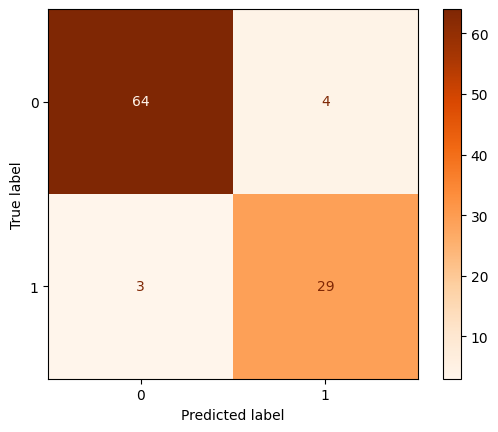

In [ ]:
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
conf_matrix_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf)
conf_matrix_rbf.plot(cmap=plt.cm.Oranges)
plt.show()

*Polynomials*

In [ ]:
classifier_poly = SVC(kernel = 'poly',degree=3, probability=True)
classifier_poly.fit(X_train, y_train)

SVC(kernel='poly', probability=True)

In [ ]:
y_pred_poly = classifier_poly.predict(X_test)
y_pred_poly

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
accuracy_poly = accuracy_score(y_test,y_pred_poly)
print(f'The polynomial accuracy score for the SVM model is {accuracy_poly}')

The polynomial accuracy score for the SVM model is 0.9


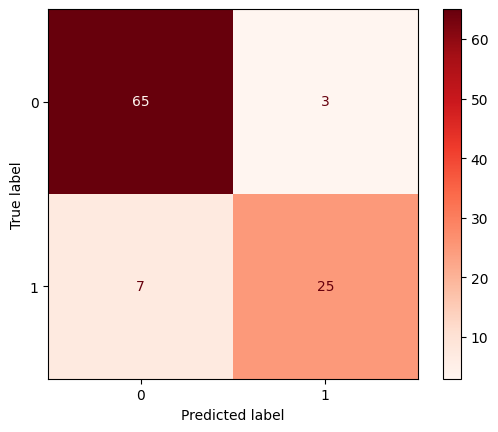

In [ ]:
cm_poly = confusion_matrix(y_test, y_pred_poly)
conf_matrix_poly = ConfusionMatrixDisplay(confusion_matrix=cm_poly)
conf_matrix_poly.plot(cmap=plt.cm.Reds)
plt.show()

Based on the above illustrations, linear kernel is the most optimal choice to train the SVM due to its high accuracy score.

<ipython-input-82-a88a0c27af53>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


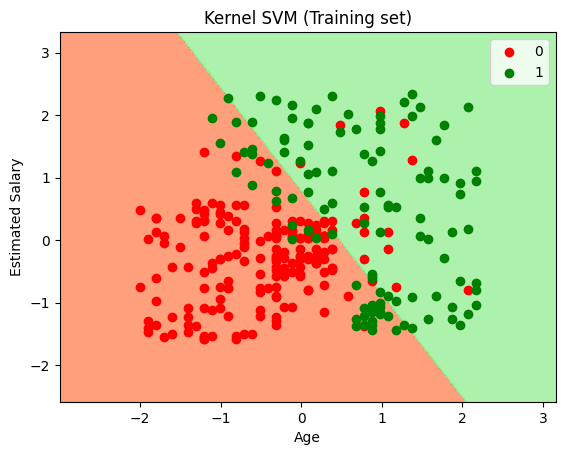

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('coral', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-83-7bc6a2c7ec06>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


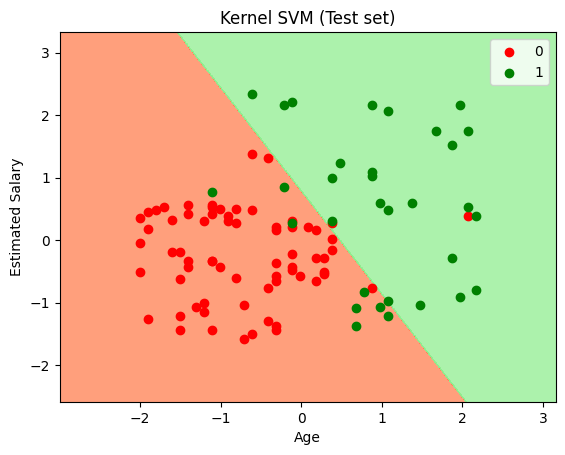

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('coral', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()